In [1]:
import pandas as pd
import numpy as np

In [2]:
path='C:/Users/rajit/spam or not.xlsx'


In [3]:
pwd

'C:\\Users\\rajit'

In [4]:
df= pd.read_excel(path)

In [5]:
df.head(10) # 1 indicates that mail is spam and 0 indicates it is not spam

,label,text
0,1.0,ounce feather bowl hummingbird opec moment ala...
1,1.0,wulvob get your medircations online qnb ikud v...
2,0.0,computer connection from cnn com wednesday es...
3,1.0,university degree obtain a prosperous future m...
4,0.0,thanks for all your answers guys i know i shou...
5,0.0,larry king live at escapenumber escapenumber p...
6,0.0,michael pobega wrote i'm not sure if it's the ...
7,0.0,hi i have this error tr sample escapenumber es...
8,1.0,works gateway world art explore tattooing full...
9,1.0,upon this account he is not only very cautious...


# 1 indicates that mail is spam and 0 indicates it is not spam

In [6]:
import string  # to handle punctuations and special symbols
from nltk.corpus import stopwords # to handle stop words

In [7]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
df.head(10)

,label,text
0,1.0,ounce feather bowl hummingbird opec moment ala...
1,1.0,wulvob get your medircations online qnb ikud v...
2,0.0,computer connection from cnn com wednesday es...
3,1.0,university degree obtain a prosperous future m...
4,0.0,thanks for all your answers guys i know i shou...
5,0.0,larry king live at escapenumber escapenumber p...
6,0.0,michael pobega wrote i'm not sure if it's the ...
7,0.0,hi i have this error tr sample escapenumber es...
8,1.0,works gateway world art explore tattooing full...
9,1.0,upon this account he is not only very cautious...


In [10]:
df.describe(include='all')

,label,text
count,3499.000000,3497
unique,NaN,3497
top,NaN,ounce feather bowl hummingbird opec moment ala...
freq,NaN,1
mean,0.534724,NaN
std,0.498864,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   3499 non-null   float64
 1   text    3497 non-null   object 
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [12]:
df.groupby('text').describe()

label                     \
                                                   count mean std  min  25%   
text                                                                          
 \\ let employers find you on job banks job sea...   1.0  0.0 NaN  0.0  0.0   
 a home jobsite the p ower marketing associatio...   1.0  0.0 NaN  0.0  0.0   
 a home jobsite the p ower marketing associatio...   1.0  0.0 NaN  0.0  0.0   
 a home jobsite the p ower marketing associatio...   1.0  0.0 NaN  0.0  0.0   
 a home jobsite the p ower marketing associatio...   1.0  0.0 NaN  0.0  0.0   
...                                                  ...  ...  ..  ...  ...   
Â‚Ã§Â‚Â¤Â‚ÂµÂ‚Ã¤Â‚Ã Â˜bÂ‚ÂµÂ‚Ã¤Â‚Â¨Â‚Â©Â‚Ã¨Â‚Â­...   1.0  1.0 NaN  1.0  1.0   
Â„Â¡Â„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„Â...   1.0  1.0 NaN  1.0  1.0   
Ã¤Ã®Ã¡Ã°Ã®Ã¥ Ã³Ã²Ã°Ã® ÃªÃ®Ã°Ã¯Ã³Ã±Ã­Ã Ã¿ Ã¬Ã¥Ã¡...   1.0  1.0 NaN  1.0  1.0   
Ã§Â°Â¡Ã´Ã¬Â¨Â¡Ã´Â½Ã³Â¡Ã´Â´Ã½Â¡Ã´Ã—Â¨Â¡Ã´Ã²ÂµÂ¡Ã...   1.0  1.0 NaN  1.0  1.0   
Ã°Ã¢Â¡Â°Ã¦Ã³Ã²ÂµÃ«Ã¹ÂµÃ£Ã«Â°Â·Â¨Â¡Â±ÂµÃ¤Â±Ã¤Â»Â...   1.0  1.0 NaN  1.0  1.0   

                                                                   
                                                    50%  75%  max  
text                                                               
 \\ let employers find you on job banks job sea...  0.0  0.0  0.0  
 a home jobsite the p ower marketing associatio...  0.0  0.0  0.0  
 a home jobsite the p ower marketing associatio...  0.0  0.0  0.0  
 a home jobsite the p ower marketing associatio...  0.0  0.0  0.0  
 a home jobsite the p ower marketing associatio...  0.0  0.0  0.0  
...                                                 ...  ...  ...  
Â‚Ã§Â‚Â¤Â‚ÂµÂ‚Ã¤Â‚Ã Â˜bÂ‚ÂµÂ‚Ã¤Â‚Â¨Â‚Â©Â‚Ã¨Â‚Â­...  1.0  1.0  1.0  
Â„Â¡Â„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„ÂŸÂ„Â...  1.0  1.0  1.0  
Ã¤Ã®Ã¡Ã°Ã®Ã¥ Ã³Ã²Ã°Ã® ÃªÃ®Ã°Ã¯Ã³Ã±Ã­Ã Ã¿ Ã¬Ã¥Ã¡...  1.0  1.0  1.0  
Ã§Â°Â¡Ã´Ã¬Â¨Â¡Ã´Â½Ã³Â¡Ã´Â´Ã½Â¡Ã´Ã—Â¨Â¡Ã´Ã²ÂµÂ¡Ã...  1.0  1.0  1.0  
Ã°Ã¢Â¡Â°Ã¦Ã³Ã²ÂµÃ«Ã¹ÂµÃ£Ã«Â°Â·Â¨Â¡Â±ÂµÃ¤Â±Ã¤Â»Â...  1.0  1.0  1.0  

[3497 rows x 8 columns]

In [13]:
df.isnull().sum()

label    1500
text     1502
dtype: int64

In [14]:
df = df.dropna()


In [15]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [16]:
df['label']

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
4994    1.0
4995    0.0
4996    0.0
4997    1.0
4998    1.0
Name: label, Length: 3497, dtype: float64

In [17]:
df['length']=df['text'].apply(len)

In [18]:
df.head()

,label,text,length
0,1.0,ounce feather bowl hummingbird opec moment ala...,148
1,1.0,wulvob get your medircations online qnb ikud v...,808
2,0.0,computer connection from cnn com wednesday es...,2235
3,1.0,university degree obtain a prosperous future m...,593
4,0.0,thanks for all your answers guys i know i shou...,1362


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3497 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   3497 non-null   float64
 1   text    3497 non-null   object 
 2   length  3497 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 109.3+ KB


In [20]:
import seaborn as sns

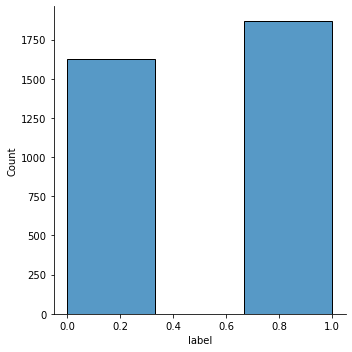

In [21]:
sns.displot(df['label'],bins=3)

In [22]:
df['length'].max()

32759

In [23]:
print(len(df[df['length']>15000]))

25


In [24]:
df.drop(df[df['length']>15000].index, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3472 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   3472 non-null   float64
 1   text    3472 non-null   object 
 2   length  3472 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 108.5+ KB


In [26]:
stop_words = set(stopwords.words('english'))

def message_text_process(mess):
    for char in mess:
        no_punctuation =''.join([char for char in mess if char not in string.punctuation])
        #no_punctuation = ''.join(no_punctuation)
        return ' '.join ([word for word in no_punctuation.split() if word.lower() not in stop_words])
            

In [27]:
message_text_process('my name is Rajith? dsaasd isdas OUR WE MY  , myself')

'name Rajith dsaasd isdas'

In [28]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [30]:
len(stopwords.words('english'))

179

In [31]:
df['text'].head(5).apply(message_text_process)

0    ounce feather bowl hummingbird opec moment ala...
1    wulvob get medircations online qnb ikud viagra...
2    computer connection cnn com wednesday escapenu...
3    university degree obtain prosperous future mon...
4    thanks answers guys know checked rsync manual ...
Name: text, dtype: object

In [32]:
df['text'].apply(message_text_process)

0       ounce feather bowl hummingbird opec moment ala...
1       wulvob get medircations online qnb ikud viagra...
2       computer connection cnn com wednesday escapenu...
3       university degree obtain prosperous future mon...
4       thanks answers guys know checked rsync manual ...
                              ...                        
4994    see accounting records echo first line cat usr...
4995    per mark palmer instruction forwarding report ...
4996    please look arescapenumber array data escapenu...
4997    message contains graphics see graphics click v...
4998    hey wanted share experiences past year many me...
Name: text, Length: 3472, dtype: object

In [33]:
df['processed_text'] = df['text'].apply(message_text_process)


In [34]:
df.head()

,label,text,length,processed_text
0,1.0,ounce feather bowl hummingbird opec moment ala...,148,ounce feather bowl hummingbird opec moment ala...
1,1.0,wulvob get your medircations online qnb ikud v...,808,wulvob get medircations online qnb ikud viagra...
2,0.0,computer connection from cnn com wednesday es...,2235,computer connection cnn com wednesday escapenu...
3,1.0,university degree obtain a prosperous future m...,593,university degree obtain prosperous future mon...
4,0.0,thanks for all your answers guys i know i shou...,1362,thanks answers guys know checked rsync manual ...


In [35]:
df

,label,text,length,processed_text
0,1.0,ounce feather bowl hummingbird opec moment ala...,148,ounce feather bowl hummingbird opec moment ala...
1,1.0,wulvob get your medircations online qnb ikud v...,808,wulvob get medircations online qnb ikud viagra...
2,0.0,computer connection from cnn com wednesday es...,2235,computer connection cnn com wednesday escapenu...
3,1.0,university degree obtain a prosperous future m...,593,university degree obtain prosperous future mon...
4,0.0,thanks for all your answers guys i know i shou...,1362,thanks answers guys know checked rsync manual ...
...,...,...,...,...
4994,1.0,to see the accounting records echo first line ...,1032,see accounting records echo first line cat usr...
4995,0.0,"per mark palmer ' s instruction , i am forward...",379,per mark palmer instruction forwarding report ...
4996,0.0,please have a look at this arescapenumber arra...,4008,please look arescapenumber array data escapenu...
4997,1.0,this message contains graphics if you do not s...,1369,message contains graphics see graphics click v...


# Applying TfidfVectorizer to convert into sparse matrix

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()



In [37]:
X=tfidf.fit_transform(df['processed_text']).toarray()

In [38]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y=df['label'].values

In [40]:
y.shape

(3472,)

In [41]:
print(f"Length of X_train: {len(X)}")
print(f"Length of y_train: {len(y)}")

Length of X_train: 3472
Length of y_train: 3472


In [42]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)



# As it is a classification model we are checking accuracy with Logistic Regression, SVM, Random forest, decision tree, gradient boosting,KNN

In [43]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(n_jobs=4,C=0.1, tol=1e-4,solver='saga') # Parallel Processing,Regularization Strength (C parameter),Convergence Criteria,Solver Selection,//

In [44]:
logistic.fit(X_train,y_train)

LogisticRegression(C=0.1, n_jobs=4, solver='saga')

In [45]:
import time

start=time.time()
logistic.fit(X_train,y_train)
end=time.time()

print(f'time take:{ end-start}.2f , seconds')

time take:27.83570909500122.2f , seconds


In [46]:
predict=logistic.predict(X_test)

In [47]:
predict

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1.

In [48]:
expected=y_test

from sklearn.metrics import accuracy_score

accuracy_score(expected,predict)

0.8633093525179856

# Using MultinomialNB(NavieBayes) which works well for spam detection

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
spam_detect6 = MultinomialNB().fit(X_train,y_train)

In [50]:
predict=spam_detect6.predict(X_test)

In [51]:
accuracy_score(y_test,predict)

0.9539568345323741

In [52]:
precision_score(y_test,predict)

0.9621621621621622

# Using SVM(Support Vector Machine)

In [53]:
from sklearn.svm import SVC
spam_detect = SVC(kernel='linear', C=1,gamma= 10).fit(X_train, y_train)

In [54]:
predicted=spam_detect.predict(X_test)

In [56]:
expect=y_test
from sklearn import metrics
print(metrics.classification_report(expect, predicted))
print(metrics.confusion_matrix(expect, predicted))
print(metrics.precision_score(expect, predicted))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       321
         1.0       0.97      0.98      0.97       374

    accuracy                           0.97       695
   macro avg       0.97      0.97      0.97       695
weighted avg       0.97      0.97      0.97       695

[[308  13]
 [  6 368]]
0.9658792650918635


In [57]:
expect=y_test

from sklearn.metrics import accuracy_score

In [58]:
accuracy_score(expect,predicted)

0.9726618705035971

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [60]:
rm=RandomForestClassifier(n_estimators=100)  #it will reach upto 100 decision trees

In [61]:
spam1=rm.fit(X_train,y_train)

In [62]:
expect1=spam1.predict(X_test)

In [63]:
accuracy_score(expect1,y_test)

0.962589928057554

In [64]:
precision_score(expect1,y_test)

0.9759358288770054

In [82]:
print(metrics.confusion_matrix(expect1, y_test))
print(metrics.precision_score(expect1, y_test))

[[304   9]
 [ 17 365]]
0.9759358288770054


# Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt=DecisionTreeClassifier()

In [67]:
spam2=dt.fit(X_train,y_train)

In [68]:
expect2=spam2.predict(X_test)

In [69]:
accuracy_score(expect2,y_test)

0.9251798561151079

In [83]:
print(metrics.confusion_matrix(expect2, y_test))
print(metrics.precision_score(expect2, y_test))

[[295  26]
 [ 26 348]]
0.93048128342246


# Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3) # if we include these parameters the accuracy is reducing due to low training values

In [72]:
spam3=GB.fit(X_train,y_train)

In [73]:
expect3=spam3.predict(X_test)

In [74]:
accuracy_score(expect3,y_test)

0.9338129496402877

In [84]:
print(metrics.confusion_matrix(expect3, y_test))
print(metrics.precision_score(expect3, y_test))

[[286  11]
 [ 35 363]]
0.9705882352941176


# KNN (K-Nearest Neighbors)

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier()

In [77]:
spam4=knn.fit(X_train,y_train)

In [78]:
except4=spam4.predict(X_test)

In [79]:
accuracy_score(except4,y_test)

0.8992805755395683

In [86]:
print(metrics.confusion_matrix(except4, y_test))
print(metrics.precision_score(except4, y_test))

[[314  63]
 [  7 311]]
0.8315508021390374


# Pickling the model

In [80]:

import pickle

#pickle_out=open("spam_model.pkl", "wb" )

pickle.dump(spam_detect, open("spam_model.pkl", "wb" ))

pickle.dump(tfidf,open('message_tfid.pkl','wb'))

my_scaler = pickle.load(open("spam_model.pkl", "rb" ))

#predictions = my_scaler.predict(X_test)

In [81]:
tfidf = pickle.load(open('message_tfid.pkl', "rb"))